In [11]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score, confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, matthews_corrcoef


In [3]:
traindata = pd.read_excel('F:/Amino acid-classifier/classifier/data/training_set_20aa.xlsx')

X = traindata[['mean', 'std', 'skew', 'kurt', 'toff']]
y = traindata['label']
X = StandardScaler().fit_transform(X)
y = LabelEncoder().fit_transform(y)



In [4]:
testdata = pd.read_excel('F:/Amino acid-classifier/classifier/data/testing_set_20aa.xlsx')
test_X = testdata.iloc[:, 0:5]
test_X = StandardScaler().fit_transform(test_X)
target = LabelEncoder().fit_transform(testdata['label'])

In [5]:
model = KNeighborsClassifier()

In [6]:
scc = ['accuracy', 'precision', 'recall', 'f1','roc_auc']
result = cross_validate(model, X, y, scoring=scc, cv=10)

C:\Users\DELL\miniconda3\envs\torch1.8\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\miniconda3\envs\torch1.8\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\DELL\miniconda3\envs\torch1.8\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\DELL\miniconda3\envs\torch1.8\lib\site-packages\sklearn\metrics\_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\DELL\miniconda3\envs\torch1.8\lib\site-packages\sklearn\metrics\_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y

In [7]:
result['test_accuracy'].mean()

0.9643750000000001

In [8]:
model.fit(X, y)
y_test = model.predict(test_X)

In [9]:
probs = model.predict_proba(test_X)
roc_auc = roc_auc_score(target, probs, multi_class="ovr")
roc_auc

0.996563961988304

In [12]:
precision = precision_score(target, y_test, average='macro') 
recall = recall_score(target, y_test, average='macro')
f1 = f1_score(target, y_test, average='macro')
mcc = matthews_corrcoef(target, y_test)

print('f1_score is:', f1)
print('recall score is:', recall)
print('precision is:', precision)
print('mcc is:', mcc)

f1_score is: 0.9613546471670172
recall score is: 0.9608333333333334
precision is: 0.9633369119277816
mcc is: 0.9588630541815849


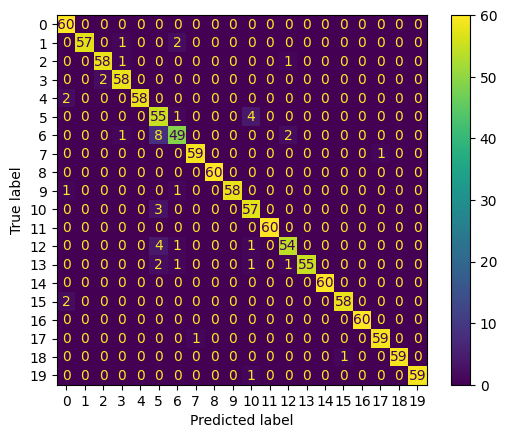

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(target, y_test)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
disp.plot()